# Data Visualization

## Amazon Sales Analysis (2019)

We have obtained Amazon Sales Data for each month in 2019. It's located in `data/`

Up to now, we've only dealt with aggregated data (in one file/location), but in this case, we have multiple csv files that we need to draw from.

Use a loop to conveniently store all of the data in one place.

In [65]:
# required imports
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import numpy as np


    




### Exercise 1: Merge data from each month into one CSV (step-by-step)

In [93]:
# 1.1 read the data files (names)
cwd = '/Users/Sam/Documents/2-Learning/5-DataScience/concordia-bootcamps/ds-data-visualization-P2/'
# Change the current working directory
os.chdir(cwd)



# Folder Path
path = 'data/Sales_Data'  
cwd += cwd
# Change the directory
os.chdir(path)


# iterate through all files, then read the file, then concatenate into the same Dataframe
salesData = pd.DataFrame()
for file in os.scandir(os.getcwd()):
    print(f'current File: {file}')
    if file.is_file():
        file_path = f"{file.path}"
        with open (file_path, "r") as stream:
            df_current = pd.read_csv(file_path)
            stream.close()
    
        salesData=pd.concat([salesData,df_current])
            

salesData





current File: <DirEntry 'Sales_December_2019.csv'>
current File: <DirEntry 'Sales_April_2019.csv'>
current File: <DirEntry 'Sales_February_2019.csv'>
current File: <DirEntry 'Sales_March_2019.csv'>
current File: <DirEntry 'Sales_August_2019.csv'>
current File: <DirEntry 'Sales_May_2019.csv'>
current File: <DirEntry 'Sales_November_2019.csv'>
current File: <DirEntry 'Sales_October_2019.csv'>
current File: <DirEntry 'Sales_January_2019.csv'>
current File: <DirEntry 'Sales_September_2019.csv'>
current File: <DirEntry 'Sales_July_2019.csv'>
current File: <DirEntry 'Sales_June_2019.csv'>


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [250]:
# 1.2 concat data from all files into one file `../data/all_data.csv`

os.chdir("..")
# Change the directory
cwd = os.getcwd()
print(cwd)

cwd = '/Users/Sam/Documents/2-Learning/5-DataScience/concordia-bootcamps/ds-data-visualization-P2/data/all_data.csv'
print(cwd)

#Exporting the dataset into a CSV. include index = False, or when generating the dataframe, 2 columns of Indexes will be present
salesData.to_csv(cwd, index=False )


/Users/Sam/Documents/2-Learning/5-DataScience/concordia-bootcamps
/Users/Sam/Documents/2-Learning/5-DataScience/concordia-bootcamps/ds-data-visualization-P2/data/all_data.csv


In [251]:
# 1.3 read the updated dataframe
cwd = '/Users/Sam/Documents/2-Learning/5-DataScience/concordia-bootcamps/ds-data-visualization-P2/data'
os.chdir(cwd)
cwd = os.getcwd()
print(cwd)

salesDataFrame = pd.read_csv('/Users/Sam/Documents/2-Learning/5-DataScience/concordia-bootcamps/ds-data-visualization-P2/data/all_data.csv')

salesDataFrame.info()






/Users/Sam/Documents/2-Learning/5-DataScience/concordia-bootcamps/ds-data-visualization-P2/data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Exercise 2: Clean up the data!

In [252]:
# 2.1 Drop rows of NAN

dfs = salesDataFrame.dropna()
dfs

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [253]:
# 2.2 Get rid of text in order date column
#help found with this video : https://www.youtube.com/watch?v=2pGUSkPbAV8

"""NOTE : noNan_DF.columns.values.tolist()
this returns the list of all existing columns so we are sure not to omit any
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
"""

# Casting the Order Date column to datetime:
dfs['Order Date']=pd.to_datetime(dfs['Order Date'],errors='coerce', format='%m/%d/%y %H:%M')
dfs.info() #Shows correct -  dtypes: datetime64[ns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        186305 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_77015/779166386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Order Date']=pd.to_datetime(dfs['Order Date'],errors='coerce', format='%m/%d/%y %H:%M')


In [254]:
# 2.3 Make columns correct type
#Except "Order Date", all columns have their Dtype to object

#Let's remove extra headers that were noticed: (the Dataframe contains several row containing the column name)
df_clean = dfs.loc[(dfs['Price Each']!='Price Each') & (dfs['Product']!='Product') 
                   & (dfs['Purchase Address']!='Purchase Address') & (dfs['Order ID']!='Order ID')
                   & (dfs['Quantity Ordered']!='Quantity Ordered')
                  ]
#df_clean


#Let's cast each column from object to their correct type
df_clean['Order ID']= df_clean['Order ID'].apply(int)
df_clean['Product']= df_clean['Product'].convert_dtypes(convert_string=True)
df_clean['Quantity Ordered']= df_clean['Quantity Ordered'].astype(int)
df_clean['Price Each']= df_clean['Price Each'].astype(np.float64)
df_clean['Purchase Address']= df_clean['Purchase Address'].convert_dtypes(convert_string=True)

df_clean.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  string        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(2), string(2)
memory usage: 9.9 MB


/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_77015/2030868146.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Order ID']= df_clean['Order ID'].apply(int)
/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_77015/2030868146.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Product']= df_clean['Product'].convert_dtypes(convert_string=True)
/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_77015/2030868146.py:15: SettingWithCopyWarning: 
A value is tryi

### Exercise 3: Augment data with additional columns

In [255]:
# 3.1 Add month column
dates = pd.to_datetime(df_clean['Order Date'])
df_clean['month'] = dates.dt.month
temp = df_clean.loc[(df_clean['month']==12)]
temp

/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_77015/2695680699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = dates.dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
115313,293993,AAA Batteries (4-pack),1,2.99,2019-12-01 00:41:00,"999 10th St, San Francisco, CA 94016",12
115418,294093,USB-C Charging Cable,1,11.95,2019-12-01 00:37:00,"51 Cherry St, New York City, NY 10001",12
115783,294441,Wired Headphones,1,11.99,2019-12-01 00:52:00,"469 Sunset St, San Francisco, CA 94016",12
115980,294629,Wired Headphones,1,11.99,2019-12-01 01:54:00,"668 Ridge St, San Francisco, CA 94016",12


In [256]:
# 3.2 Add city column
#Algorithm:
# the city is taken from the address column. To do this, we split the string into a list after each coma
listAddresses = df_clean['Purchase Address']
cityList=[]
for address in listAddresses:
    street, city, postalcode = address.split(",")
    cityList.append(city)
cityList

#Now a new column is created equal to our list of cities 
df_clean['city']=cityList
df_clean


/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_77015/1311771251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['city']=cityList


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,Boston
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,New York City
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,San Francisco
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,San Francisco


### Exercise 4: Data Exploration!

#### Question 4.1: What was the best month for sales? How much was earned that month? 

In [257]:
# 4.1  What was the best month for sales? 
#df_clean.columns.values.tolist() #['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address','month','city']

#to find the best month:
#1- We aggregate the price of each month into a column 'Price each'
df_bestmonth = df_clean.groupby(['month'])['Price Each'].agg(np.sum)
#df_bestmonth is a Serie
df_bestmonth.reset_index()

#2-From the previous dataset, We take the row with the maximum Sales per month
highestSales = df_bestmonth.agg(np.max)

# conversion of df_bestmonth to a dataframe
bestmonth_df = df_bestmonth.to_frame(name='Max Sold')
#bestmonth_df


#3- We loc the row on the highestSales to find out the best sales month
bestMonthToSell = bestmonth_df.loc[(bestmonth_df['Max Sold']==highestSales)]
bestMonthToSell
#DECEMBER is the best month to sell

,Max Sold
month,
12,4588415.41


In [179]:
# 4.1 continued:  How much was earned that month?

#See both answers in the previous block

#DECEMBER is the best month to sell
#     4588415.41 $ worth of value was sold


#### Question 4.2: What city sold the most product?

In [258]:
# 4.2
#To find out the city with the best Sales, we use the same algorithm as previously 4.1

df_bestcity = df_clean.groupby(['city'])['Price Each'].agg(np.sum)
#df_bestmonth is a Serie
df_bestcity.reset_index()

highestcitySales = df_bestcity.agg(np.max)

#Want to convert df_bestcity to a dataframe
bestcity_df = df_bestcity.to_frame(name='best city')
#bestmonth_df



bestCityToSell = bestcity_df.loc[(bestcity_df['best city']==highestcitySales)]
bestCityToSell

,best city
city,
San Francisco,8211461.74


In [ ]:
# 4.2 continued

#the BEST city sold an amount of 8211461.74 $ 


#### Question 4.3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [259]:
# 4.3.1 Add hour column

df_clean['hour']=(df_clean['Order Date'].dt.hour.astype(str))
df_clean['hour']



df_clean['hour']=pd.to_datetime(df_clean['hour'],errors='coerce', format='%H')
df_clean


/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_77015/3348714276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['hour']=(df_clean['Order Date'].dt.hour.astype(str))
/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_77015/3348714276.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['hour']=pd.to_datetime(df_clean['hour'],errors='coerce', format='%H')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,1900-01-01 00:00:00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,1900-01-01 07:00:00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,1900-01-01 18:00:00
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,1900-01-01 15:00:00
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,1900-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,Boston,1900-01-01 19:00:00
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,New York City,1900-01-01 19:00:00
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,San Francisco,1900-01-01 18:00:00
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,San Francisco,1900-01-01 18:00:00


In [260]:
# 4.3.2 Results

#Same algo as 4.1
df_besttime = df_clean.groupby(['hour'])['Price Each'].agg(np.sum)
#df_bestmonth is a Serie
df_besttime.reset_index()
df_besttime


besttimeSales = df_besttime.agg(np.max)

#Want to convert df_bestcity to a dataframe
besttime_df = df_besttime.to_frame(name='best time')



bestTimeToSell = besttime_df.loc[(besttime_df['best time']==besttimeSales)]
bestTimeToSell

# Advertising before 19:00 is the best time 

,best time
hour,
1900-01-01 19:00:00,2398588.31


#### Question 4.4: What products are most often sold together?

In [283]:
#['Order ID', 'Order Date', 'Purchase Address' ]
#Algorithm:
#1-we look for Orders with the SAME ID: The products sold together should have the same 'Order ID',
#2- We put the articles sold under the same Order ID, into a list
#3- We put all the lists into a list 
#4- We evaluate the possible combinaisons in each list of product and count them: return a dictionary
#5- Within the dictionary we search the combinaison with the highest value 

#1
countOrders = df_clean['Order ID'].value_counts()
listOrdersWithMorethan2Products = df_clean['Order ID'].isin(countOrders.index[countOrders >= 2])
df_atLeast2prods = df_clean[listOrdersWithMorethan2Products]

#2
df_listProducts = df_atLeast2prods.groupby(['Order ID'])['Product'].apply(list).reset_index()

#3
listProductBundle = df_listProducts['Product'].tolist()


#4
from itertools import combinations
from collections import Counter

count = Counter()
for sublist in listProductBundle:
    count.update(Counter(combinations(sublist, 2)))

#5
highestCount = 0
for v in count.values():
    if v>=highestCount:
        highestCount=v

def get_key(val):
    for k, v in count.items():
        if v == val:
            return k
list_popular_items_sold_together = get_key(highestCount)

print(f'The most popular items sold together are: {list_popular_items_sold_together}')
        
    


The most popular items sold together are: ('iPhone', 'Lightning Charging Cable')


In [284]:
#This box is NOT for evaluation

# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
#Filter df by value counts:
#counts = df_clean['Product'].value_counts()
#lineProductSup10000 = df_clean['Product'].isin(counts.index[counts > 10000])
#df_2products = df_clean[lineProductSup10000]
#df_2products


# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
#Apply a Lambda to a groupBy result: 
#df.groupby(['name','month'])['text'].apply(lambda x: ','.join(x)).reset_index()

In [287]:
#This box is NOT for evaluation

# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
#Counting "unique pairs" of numbers into a dictionary:
#count pairs that arise from combinations in your lists. 
#You can find those with a Counter and combinations.
#from itertools import combinations
#from collections import Counter

#list2 = [2, 3, 4] #Better if only unique items. Or there will be redundancies. Also works with List of List list3 = [[2, 3], [2, 3, 4]]
#combinations(list2, 2)
#count = Counter(combinations(list2, 2))
#print(count) #Counter({(2, 3): 1, (2, 4): 1, (3, 4): 1}) NOTE: on compte pas les permutations
# 1 combinaison (2,3)
# 1 combinaison (2,4)
# 1 combinaison (3,4)

## Exercise 5: Most Popular Product?

What product sold the most? Why do you think it sold the most?

In [290]:
# exercise 5
#Same algo as 4.1

df_bestproduct = df_clean.groupby(['Product'])['Price Each'].agg(np.sum)
#df_bestproduct is a Serie
df_bestproduct.reset_index()

highestproductSales = df_bestproduct.agg(np.max)

#Want to convert df_bestcity to a dataframe
bestproduct_df = df_bestproduct.to_frame(name='best product')



bestproduct_df = bestproduct_df.loc[(bestproduct_df['best product']==highestproductSales)]
bestproduct_df

#The best sold product is a Macbook Pro Laptop

,best product
Product,
Macbook Pro Laptop,8030800.0


In [291]:
# exercise 5 continued: Why do you think it sold the most?

# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib


# To answer this open ended question, Let's try to explore the dataset from different perspectives
#1- Each Product Boxplot
#2- Quantity of products sold
#3- Total Price of products sold per month

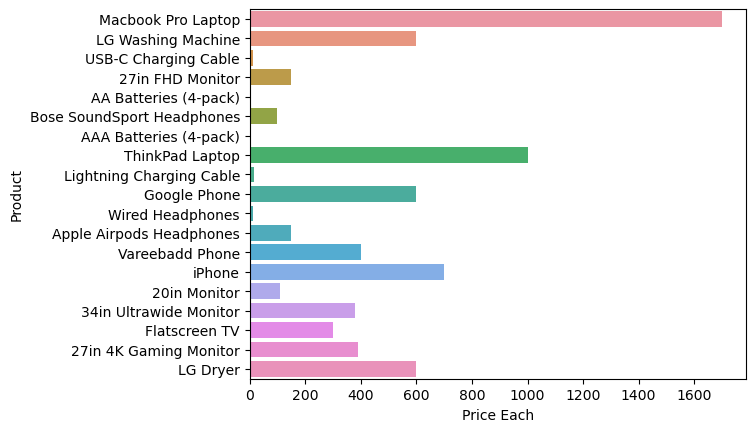

In [345]:
# exercise 5 continued:

#1- Each Product Boxplot
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
%matplotlib inline

sns.barplot(x=df_clean['Price Each'],y=df_clean['Product'])
plt.show()

# Partial Conclusion: The Macbook Pro Laptop is the most expensive item sold amon all the products

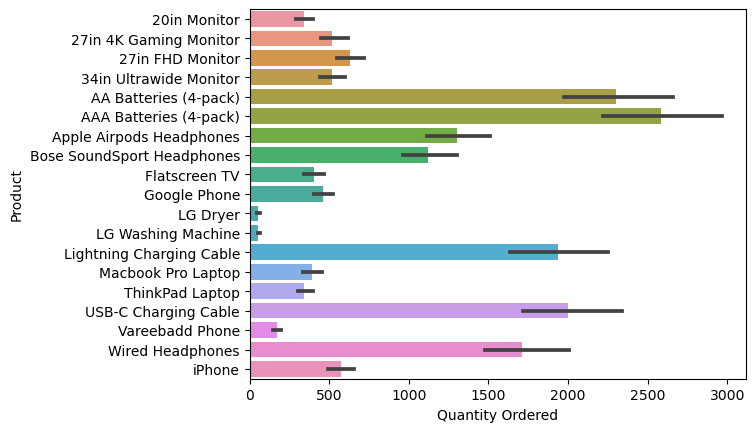

In [360]:
# exercise 5 continued:
#2- Quantity of products sold: 

df_productquantity = df_clean.groupby(['month','Product','Price Each'])['Quantity Ordered'].agg(np.sum).reset_index()
sns.barplot(x=df_productquantity['Quantity Ordered'],y=df_productquantity['Product'])
plt.show()

# Partial Conclusion: The Macbook Pro Laptop has among the lowest quantity of product sold

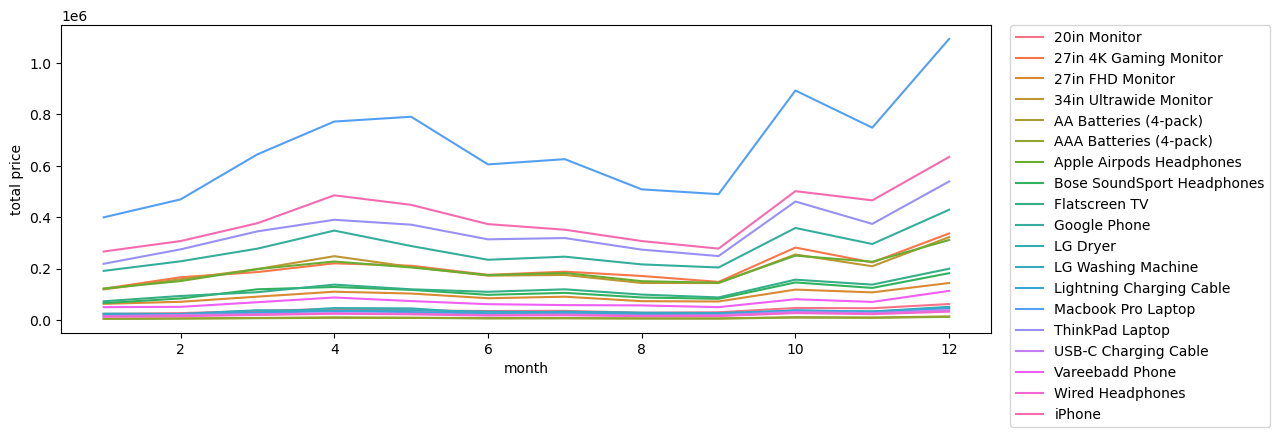

"GENERAL CONCLUSION: Even though the Macbook Pro Laptop isn't sold in a high quantity,\nit's price is such that it largely tops the global sales for the whole year.\n"

In [362]:
# exercise 5 continued:
#3- Total Price of product sold per month
#a new column to calculate the total price, is added
df_productquantity['total price'] = df_productquantity['Price Each']* df_productquantity['Quantity Ordered']

f, ax1 = plt.subplots(1,figsize=(12,4),sharey=True)
sns.lineplot(ax=ax1, x=df_productquantity['month'],y=df_productquantity['total price'],  hue=df_productquantity['Product'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) #To place legend on the left of the graph
plt.show()

"""GENERAL CONCLUSION: Even though the Macbook Pro Laptop isn't sold in a high quantity,
it's price is such that it largely tops the global sales for the whole year.
"""


## Note

This activity was taken from https://github.com/KeithGalli/Pandas-Data-Science-Tasks. We modified to be exercises rather than a code-along tutorial. 

Once you have completed all, or as much as you can, of the activity, feel free to watch [Keith Galli's accompanying video](https://www.youtube.com/watch?v=eMOA1pPVUc4).